<a href="https://colab.research.google.com/github/Abhaytyagi55/Abhaytyagi55/blob/main/Instagram_Content_Strategy_Optimization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instagram Content Strategy Optimization: Overview and Dataset**

This analysis aims to optimize Instagram content strategies by leveraging data-driven insights to enhance engagement metrics such as Impressions, Reach, Likes, Shares, Saves, Comments and Follows. The scope includes identifying high-performing post types, optimal posting times, and themes or topics that drive the most interactions. Additionally, we will analyze seasonal trends and define a dynamic posting strategy tailored to audience behaviour.

The dataset we will use for this task contains detailed information about 446 Instagram posts, including post types (Reels, Carousels, Images), timestamps, engagement metrics, and post descriptions.

Now, let’s get started with the task of Instagram Content Strategy Optimization by importing the dataset:



In [1]:
import pandas as pd

# Upload the first CSV file (replace 'file1.csv' with the actual filename)
from google.colab import files
uploaded = files.upload()

Saving Instagram-Data.csv to Instagram-Data.csv


In [3]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

instagram_data = pd.read_csv('Instagram-Data.csv')

instagram_data.head()

,Post ID,Description,Duration (secs),Publish time,Permalink,Post type,Data comment,Date,Impressions,Reach,Likes,Shares,Follows,Comments,Saves,Plays
0,1.799668e+16,Building end-to-end projects will help you lea...,0,01/02/2024 20:19,https://www.instagram.com/p/C1n9wjkLL71/,IG carousel,NaN,Lifetime,20149,16693,741,131,22.0,6,890,NaN
1,1.800604e+16,Data Engineers are crucial in ensuring that da...,0,01/01/2024 20:26,https://www.instagram.com/p/C1lZvITLD3O/,IG carousel,NaN,Lifetime,15666,13075,538,67,31.0,5,490,NaN
2,1.829417e+16,Here’s a list of 190+ Data Science projects ba...,0,03/29/2024 23:00,https://www.instagram.com/p/C5IKcAfLurI/,IG image,NaN,Lifetime,222022,170730,783,127,252.0,17,995,0.0
3,1.809139e+16,"During cricket leagues like IPL, we see a lot ...",0,03/29/2024 02:52,https://www.instagram.com/p/C5GAPksLLRy/,IG carousel,NaN,Lifetime,17930,15271,573,114,18.0,8,576,NaN
4,1.796449e+16,The tools used by a data scientist can vary si...,0,03/28/2024 02:50,https://www.instagram.com/p/C5DbPM8ry8P/,IG carousel,NaN,Lifetime,15530,12885,636,113,29.0,11,911,NaN


**Analyzing Content Performance**

Let’s get straight into the analysis of the content performance. Let’s analyze what type of content (like reels vs. carousels) performs best in terms of engagement metrics:

In [4]:
import plotly.express as px

# filter data for relevant metrics and post types
engagement_metrics = ['Impressions', 'Reach', 'Likes', 'Shares', 'Follows', 'Comments', 'Saves']
content_performance = instagram_data[['Post type'] + engagement_metrics]

# group by 'Post type' and calculate average engagement metrics
performance_summary = content_performance.groupby('Post type').mean().reset_index()

# melt the data for easier plotting
performance_melted = performance_summary.melt(id_vars=['Post type'], var_name='Metric', value_name='Average Value')

# plotting engagement metrics by post type
fig = px.bar(
    performance_melted,
    x='Metric',
    y='Average Value',
    color='Post type',
    barmode='group',
    title='Average Engagement Metrics by Post Type',
    labels={'Metric': 'Engagement Metric', 'Average Value': 'Average Value'},
    text_auto='.2s'
)

fig.update_layout(
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend_title='Post Type',
    xaxis_tickangle=45
)

fig.show()


Excluding IG images, as their results are influenced by promotions, IG reels perform best in terms of engagement metrics, particularly in likes (1.1k), saves (600), and comments (14). While IG carousels have higher impressions (27k) and reach (22k) compared to reels, the reels drive more active user engagement.

It suggests that reels are the most effective content type for organic engagement, while carousels are better for visibility.

Now, let’s analyze what time of the day or day of the week maximizes reach or impressions:



In [6]:
# creating additional time-based features
instagram_data['Day of Week'] = instagram_data['Publish time'].dt.day_name()
instagram_data['Hour of Day'] = instagram_data['Publish time'].dt.hour

# grouping data by day of the week and hour of the day for Reach and Impressions
time_analysis = instagram_data[['Day of Week', 'Hour of Day', 'Impressions', 'Reach']]

# aggregating metrics
day_of_week_summary = time_analysis.groupby('Day of Week')[['Impressions', 'Reach']].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
hour_of_day_summary = time_analysis.groupby('Hour of Day')[['Impressions', 'Reach']].mean()

# visualization: Day of the Week
fig_day = go.Figure()
fig_day.add_trace(go.Bar(
    x=day_of_week_summary.index,
    y=day_of_week_summary['Impressions'],
    name='Impressions',
    marker_color='steelblue'
))
fig_day.add_trace(go.Bar(
    x=day_of_week_summary.index,
    y=day_of_week_summary['Reach'],
    name='Reach',
    marker_color='orange'
))
fig_day.update_layout(
    title='Average Reach and Impressions by Day of the Week',
    xaxis_title='Day of the Week',
    yaxis_title='Average Value',
    barmode='group',
    xaxis_tickangle=45
)

fig_day.show()

# visualization: Hour of the Day
fig_hour = go.Figure()
fig_hour.add_trace(go.Scatter(
    x=hour_of_day_summary.index,
    y=hour_of_day_summary['Impressions'],
    mode='lines+markers',
    name='Impressions',
    line=dict(color='steelblue')
))
fig_hour.add_trace(go.Scatter(
    x=hour_of_day_summary.index,
    y=hour_of_day_summary['Reach'],
    mode='lines+markers',
    name='Reach',
    line=dict(color='orange')
))
fig_hour.update_layout(
    title='Average Reach and Impressions by Hour of the Day',
    xaxis_title='Hour of the Day',
    yaxis_title='Average Value',
    xaxis=dict(tickmode='linear', tick0=0, dtick=1)
)

fig_hour.show()

The first graph shows that Fridays and Saturdays maximize reach and impressions, with Friday having the highest average values for both metrics.

The second graph reveals that the early hours of the day, particularly around 1 AM and 7-8 AM US time (11:30 AM and 5:30-6:30 PM IST), see peaks in both reach and impressions, while engagement significantly drops between late morning (9-11 AM US time or 7:30-9:30 PM IST) and early afternoon.

**Topic-Based Analysis**

Now, let’s analyze which topics or descriptions generate the most user interactions (comments, likes, saves). We’ll find the intent of the posts and create broader categories for all posts:



In [7]:
# clean the descriptions by removing hashtags
instagram_data['Cleaned Description'] = instagram_data['Description'].str.replace(r'#\S+', '', regex=True)
interaction_metrics = ['Likes', 'Comments', 'Saves']

# define topics and their associated keywords
topics = {
    "Projects": ["projects", "solved", "explained", "ideas"],
    "Learning and Education": ["learning", "science", "learn", "python", "analysis"],
    "Problem-Solving": ["problems", "using", "algorithms"],
    "Actionable Content": ["try", "use", "list", "let"],
    "Career Growth": ["link", "bio"],
}

# aggregate engagement metrics by topic
topic_engagement = {
    topic: instagram_data[
        instagram_data['Cleaned Description']
        .str.contains('|'.join(keywords), case=False, na=False)][interaction_metrics].mean()
    for topic, keywords in topics.items()
}

# convert to DataFrame
topic_engagement_df = pd.DataFrame(topic_engagement).T.reset_index()
topic_engagement_df.columns = ['Topic', 'Likes', 'Comments', 'Saves']

# melt DataFrame for Plotly
topic_engagement_melted = topic_engagement_df.melt(
    id_vars='Topic', var_name='Engagement Metric', value_name='Average Value'
)

fig = px.bar(
    topic_engagement_melted,
    x='Topic',
    y='Average Value',
    color='Engagement Metric',
    barmode='group',
    title='Average User Interactions by Topic',
    labels={'Average Value': 'Average Interactions'},
    text_auto='.2s',
)

fig.update_layout(
    title_font_size=16,
    xaxis_title='Topic',
    yaxis_title='Average Interactions',
    legend_title='Engagement Metric',
    xaxis_tickangle=45
)

fig.show()

The graph indicates that:

1.Content related to Projects generates the highest user interactions, particularly in terms of saves (1.5k) and likes (900).

2.Career Growth also performs well, with significant saves (1.3k) and likes (910).

3.Actionable Content stands out for its balance across saves (1.2k) and likes (910).

4.In contrast, Learning and Education and Problem-Solving generate comparatively fewer interactions, particularly in saves and comments.

These findings suggest focusing on Projects and Career Growth topics to maximize user engagement.

Now, let’s analyze which types of posts lead to the highest number of new followers:

In [8]:
follows_by_post_type = instagram_data.groupby('Post type')['Follows'].mean().sort_values(ascending=False).reset_index()

# plotting follows by post type using a donut chart
fig = px.pie(
    follows_by_post_type,
    names='Post type',
    values='Follows',
    title='Average New Follows by Post Type',
    hole=0.4,
    labels={'Post type': 'Post Type', 'Follows': 'Average New Follows'},
)

fig.update_traces(
    textinfo='percent+label',  # display percentage and label on the chart
    pull=[0.1 if i == follows_by_post_type['Follows'].idxmax() else 0 for i in range(len(follows_by_post_type))]
)  # highlight the post type with the highest average follows

fig.update_layout(
    title_font_size=16,
)

fig.show()

The graph shows that IG reels lead to the highest number of new follows, accounting for 47.4% of the total, followed by IG images at 34.7% (which usually comes from promotions). IG carousels contribute the least, with 17.9% of new followers.

This indicates that reels are the most effective post type for attracting new followers, likely due to their engaging and dynamic format.

Now, let’s analyze what characteristics make a post go viral:

In [10]:
import plotly.express as px

# define "viral" posts as those with impressions in the top 10% of the dataset
viral_threshold = instagram_data['Impressions'].quantile(0.90)
viral_posts = instagram_data[instagram_data['Impressions'] >= viral_threshold].copy()

# assign topics based on keywords in descriptions
def assign_topic(desc):
    desc = desc.lower() if isinstance(desc, str) else ""
    if 'projects' in desc:
        return 'Projects'
    elif any(word in desc for word in ['learn', 'science', 'analysis', 'python']):
        return 'Learning and Education'
    elif any(word in desc for word in ['problems', 'using', 'algorithms']):
        return 'Problem-Solving'
    elif any(word in desc for word in ['list', 'try', 'let', 'use']):
        return 'Actionable Content'
    elif any(word in desc for word in ['bio', 'link']):
        return 'Career Growth'
    else:
        return 'Other'

viral_posts['Topic'] = viral_posts['Cleaned Description'].apply(assign_topic)

# aggregating viral posts by topic and day of the week
viral_topic_day = viral_posts.groupby(['Topic', 'Day of Week'])[['Impressions']].mean().reset_index()

# visualization: Viral posts by topic and day of the week
fig = px.bar(
    viral_topic_day,
    x='Day of Week',
    y='Impressions',
    color='Topic',
    barmode='group',
    title='Viral Posts by Topic and Day of the Week (Impressions)',
    labels={'Impressions': 'Average Impressions', 'Day of Week': 'Day of the Week'},
    text_auto='.2s'
)

fig.update_layout(
    title_font_size=16,
    xaxis_title='Day of the Week',
    yaxis_title='Average Impressions',
    legend_title='Topic',
    xaxis_tickangle=45
)

fig.show()

The graph shows that posts on Career Growth and Projects tend to go viral, which achieves the highest impressions of 210k. Career Growth performs exceptionally well on Wednesdays, while Projects dominate on Fridays and Saturdays. In contrast, Learning and Education consistently receive lower impressions across all days, peaking at 130k on Thursdays.

It suggests that focusing on actionable and relatable topics like career growth and project insights, combined with strategic posting on high-engagement days like Wednesday, Friday, and Saturday, increases the likelihood of a post going viral.


**Seasonal Trends in Engagement**

Now, let’s analyze if there are seasonal or recurring trends in engagement metrics:

In [11]:
# extract month and week from the Publish time for seasonal trend analysis
instagram_data['Month'] = instagram_data['Publish time'].dt.month_name()
instagram_data['Week'] = instagram_data['Publish time'].dt.isocalendar().week

# group data by month and week to analyze trends in engagement metrics
monthly_engagement = instagram_data.groupby('Month')[engagement_metrics].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
).reset_index()

weekly_engagement = instagram_data.groupby('Week')[engagement_metrics].mean().reset_index()

# visualization: Monthly engagement trends
fig_monthly = px.line(
    monthly_engagement.melt(id_vars='Month', var_name='Engagement Metric', value_name='Average Value'),
    x='Month',
    y='Average Value',
    color='Engagement Metric',
    markers=True,
    title='Monthly Trends in Engagement Metrics',
    labels={'Average Value': 'Average Engagement', 'Month': 'Month'}
)

fig_monthly.update_layout(
    title_font_size=16,
    xaxis_title='Month',
    yaxis_title='Average Engagement Metrics',
    xaxis_tickangle=45
)

# visualization: Weekly engagement trends
fig_weekly = px.line(
    weekly_engagement.melt(id_vars='Week', var_name='Engagement Metric', value_name='Average Value'),
    x='Week',
    y='Average Value',
    color='Engagement Metric',
    markers=True,
    title='Weekly Trends in Engagement Metrics',
    labels={'Average Value': 'Average Engagement', 'Week': 'Week of the Year'}
)

fig_weekly.update_layout(
    title_font_size=16,
    xaxis_title='Week of the Year',
    yaxis_title='Average Engagement Metrics',
    xaxis_tickmode='linear',
    xaxis_dtick=5
)

fig_monthly.show()
fig_weekly.show()

The graphs reveal seasonal and recurring trends in engagement metrics. Monthly data shows a peak in impressions and reach during February and March, followed by a gradual decline through the year, indicating heightened activity in the early months. Weekly data highlights spikes in engagement during the initial weeks of the year, with fluctuations throughout and a general stabilization in later weeks.

This suggests that engagement is higher at the beginning of the year, possibly due to new campaigns or audience activity, and decreases over time with smaller periodic peaks.

**Finding a Data-Driven Strategy for Instagram Content Optimization**

Now, we will find a data-driven strategy for Instagram Content Optimization. Our strategy will be focused on:

1.Finding which post type drives the most followers for each day.

2.Finding the post type that engages the audience best (Likes, Comments, Shares, Saves).

3.And, determining the best hour to post to achieve the highest impressions and reach.

Here’s how to build such a data-driven strategy:

In [12]:
# group data by post type and calculate average engagement metrics
post_type_summary = instagram_data.groupby('Post type')[
    ['Follows', 'Likes', 'Comments', 'Shares', 'Saves', 'Impressions', 'Reach']
].mean()

# add day of the week and hour of the day to the dataset
day_time_summary = instagram_data.copy()
day_time_summary['Day of Week'] = day_time_summary['Publish time'].dt.day_name()
day_time_summary['Hour of Day'] = day_time_summary['Publish time'].dt.hour

# group data by day of the week and post type to calculate daily engagement metrics
daily_post_type_summary = day_time_summary.groupby(['Day of Week', 'Post type'])[
    ['Follows', 'Likes', 'Comments', 'Shares', 'Saves', 'Impressions', 'Reach']
].mean()

# prepare a list to store daily best strategies
daily_best_summary = []

# generate a summary for each day of the week
for day in day_time_summary['Day of Week'].unique():
    # Filter data for the specific day
    day_data = day_time_summary[day_time_summary['Day of Week'] == day]

    # group by post type for the day
    post_type_day = daily_post_type_summary.loc[day]

    # find the best post type for follower growth and overall interactions
    best_post_follows = post_type_day['Follows'].idxmax()
    best_post_interactions = post_type_day[['Likes', 'Comments', 'Shares', 'Saves']].mean(axis=1).idxmax()

    # find the best posting hour based on impressions and reach
    hourly_summary = day_data.groupby('Hour of Day')[['Impressions', 'Reach']].mean()
    best_hour = hourly_summary.mean(axis=1).idxmax()

    # append results for the day
    daily_best_summary.append({
        "Day": day,
        "Best Post Type for Follower Growth": best_post_follows,
        "Best Post Type for Interactions": best_post_interactions,
        "Best Posting Hour": f"{best_hour}:00"
    })

# convert the list of summaries to a DataFrame
daily_summary_table = pd.DataFrame(daily_best_summary)
daily_summary_table

,Day,Best Post Type for Follower Growth,Best Post Type for Interactions,Best Posting Hour
0,Tuesday,IG reel,IG reel,0:00
1,Monday,IG carousel,IG carousel,4:00
2,Friday,IG reel,IG reel,20:00
3,Thursday,IG reel,IG reel,7:00
4,Wednesday,IG reel,IG reel,6:00
5,Saturday,IG image,IG reel,2:00
6,Sunday,IG reel,IG reel,8:00


from matplotlib import pyplot as plt
import seaborn as sns
daily_summary_table.groupby('Day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
daily_summary_table.groupby('Best Post Type for Follower Growth').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
daily_summary_table.groupby('Best Post Type for Interactions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
daily_summary_table.groupby('Best Posting Hour').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Best Post Type for Follower Growth'].value_counts()
    for x_label, grp in daily_summary_table.groupby('Day')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Day')
_ = plt.ylabel('Best Post Type for Follower Growth')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Best Post Type for Interactions'].value_counts()
    for x_label, grp in daily_summary_table.groupby('Best Post Type for Follower Growth')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Best Post Type for Follower Growth')
_ = plt.ylabel('Best Post Type for Interactions')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Best Posting Hour'].value_counts()
    for x_label, grp in daily_summary_table.groupby('Best Post Type for Interactions')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Best Post Type for Interactions')
_ = plt.ylabel('Best Posting Hour')

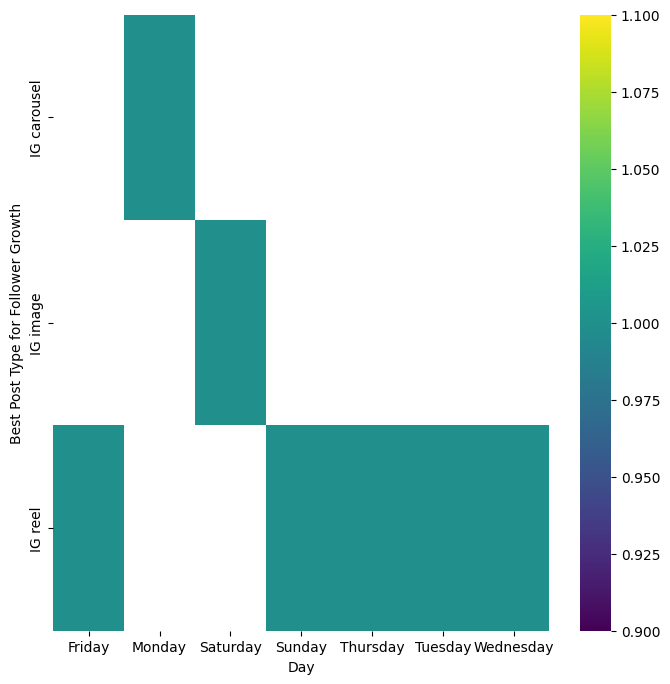

In [13]:
# @title Day vs Best Post Type for Follower Growth

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Best Post Type for Follower Growth'].value_counts()
    for x_label, grp in daily_summary_table.groupby('Day')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Day')
_ = plt.ylabel('Best Post Type for Follower Growth')

The data-driven strategy highlights that IG reels consistently outperform other content types for both follower growth and interactions across most days, with the best times varying by day (e.g., 0:00 on Tuesday, 20:00 on Friday, and 7:00 on Thursday). IG carousels are effective on Mondays for both follower growth and interactions, while IG images perform best on Saturdays.

So, to optimize content creation, prioritize IG reels, post at the specified best hours for each day, and strategically use carousels and images on their most effective days.

**Summary**

So, by focusing on IG reels for both follower growth and engagement, leveraging actionable topics like projects and career growth, and strategically posting at optimal times and days, businesses can maximize their reach, impressions, and interactions.